In [7]:
#==============================================================================
#=====     change current working directory and some configurations
#==============================================================================
import os
path = r'C:\Users\eight\Desktop\Kelvin HDD\3. Coursera\A. Projects\3. Stack Overflow Q&A --- Kaggle'
os.chdir(path)
os.getcwd()

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 50)


In [8]:
#==============================================================================
#=====     read datasets and looking at the contents
#==============================================================================
data_qns = pd.read_csv('Questions.csv', encoding = 'latin-1')
data_ans = pd.read_csv('Answers.csv', encoding = 'latin-1')
data_tags = pd.read_csv('Tags.csv', encoding = 'latin-1')

data_qns.head(); data_qns.shape
data_ans.head(); data_ans.shape  #'ParentId' links back to the 'Id' of the questions dataset
data_tags.head(); data_tags.shape

# order the datasets by 'Id' for the questions dataset, 'ParentId' for answers datasets
data_ans.sort_values(by = 'ParentId').head(200)


,Id,OwnerUserId,CreationDate,ParentId,Score,Body
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
219787,3770976,364174.0,2010-09-22T15:37:30Z,80,1,<p>What about making your delimiter something ...
336,10008,1109.0,2008-08-13T16:09:09Z,80,6,"<p>The <a href=""http://en.wikipedia.org/wiki/S..."
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
10748,202317,20709.0,2008-10-14T18:41:45Z,90,2,"<p>You can also try <em><a href=""http://www.co..."
85572,1466832,16012.0,2009-09-23T15:40:46Z,90,19,<p>My easy click-by-click instructions (<stron...
6436,124363,12734.0,2008-09-23T22:41:11Z,120,9,<p>The Jeff Prosise version from MSDN magazine...
446804,7815745,678455.0,2011-10-19T01:58:23Z,180,1,<p>I know this an old post but I found it whil...
4761,93908,16632.0,2008-09-18T16:01:24Z,180,7,"<p>Some related resources:</p>\n\n<p><a href=""..."
2901,59760,5845.0,2008-09-12T19:00:13Z,180,17,<p>It would be best to find colors maximally d...


In [9]:
#==============================================================================
#=====     perform cleaning of the text for answers and questions
#==============================================================================
# look at a data sample
list(data_qns)
text = data_qns.Body[0]

# create a function to do the cleaning
def clear_tags_clean_up(text):
	import re		
	text = re.sub("<pre>.*</pre>", "", text, flags = re.DOTALL) # removes the codes
	text = re.sub("<.*?>", "", text) # removes unnecessary tags
	#text = re.sub("PageContent.*PageContent", "", text)
	text = re.sub("\r", "", text)
	text = re.sub("[\s]{2,}", " ", text)
	return re.sub("\n", "", text) # removes newline characters
	
# clean up the text body for both datasets
data_qns['cleaned_qns'] = data_qns.Body.apply(clear_tags_clean_up)
data_ans['cleaned_ans'] = data_ans.Body.apply(clear_tags_clean_up)


In [10]:
#==============================================================================
#=====     feature engineering
#==============================================================================
# lets include the feature about the len of the text
data_qns['length'] = data_qns.cleaned_qns.apply(len)
data_ans['length'] = data_ans.cleaned_ans.apply(len)

data_qns.head(50)
data_ans.head(50)


,Id,OwnerUserId,CreationDate,ParentId,Score,Body,cleaned_ans,length
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",Version Control with Subversion A very good re...,124
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...,"I wound up using this. It is a kind of a hack,...",154
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...,I've read somewhere the human eye can't distin...,535
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur...","Yes, I thought about that, but I soon figured ...",937
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article...",Oleg Shilo's C# Script solution (at The Code P...,847
5,332,59.0,2008-08-02T03:00:24Z,330,19,<p>I would be a bit reluctant to use nested cl...,I would be a bit reluctant to use nested class...,766
6,344,100.0,2008-08-02T04:18:15Z,260,6,<p>You might be able to use IronRuby for that....,You might be able to use IronRuby for that. Ot...,416
7,359,119.0,2008-08-02T06:16:23Z,260,5,"<P>You could use any of the DLR languages, whi...","You could use any of the DLR languages, which ...",328
8,473,49.0,2008-08-02T15:33:13Z,470,8,"<p>No, what you're doing is fine. Don't let th...","No, what you're doing is fine. Don't let those...",605
9,529,86.0,2008-08-02T18:16:07Z,180,3,<p>Isn't it also a factor which order you set ...,Isn't it also a factor which order you set up ...,246


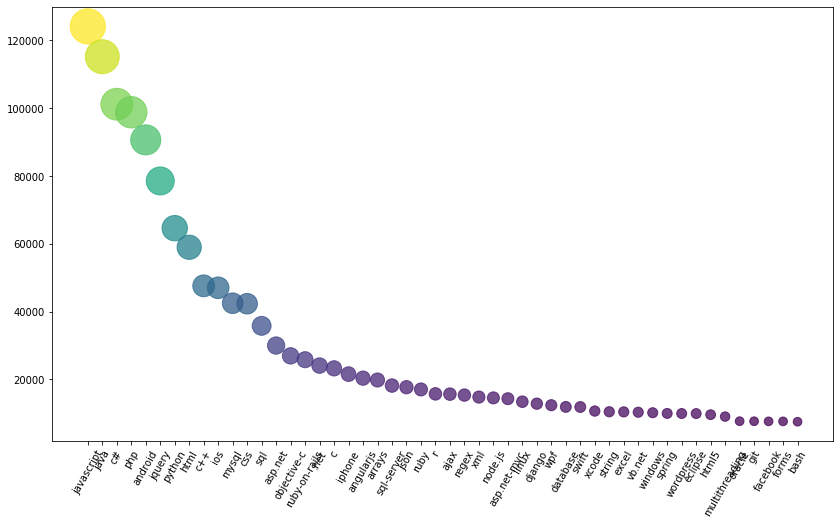

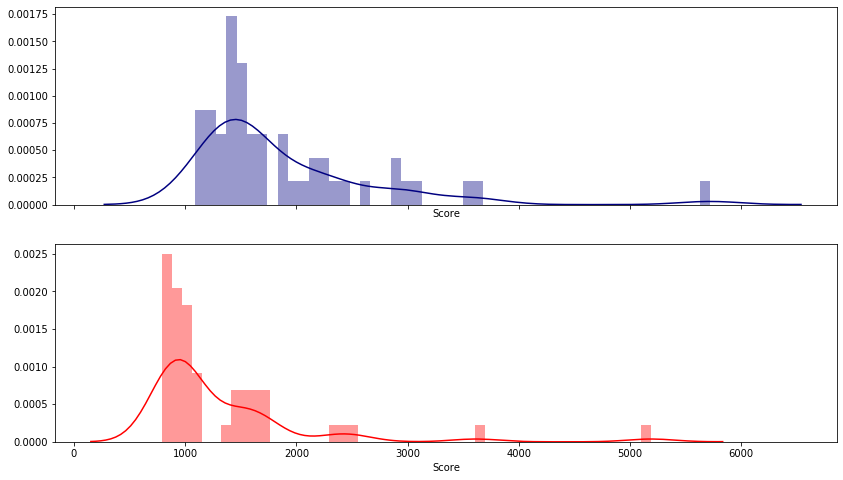

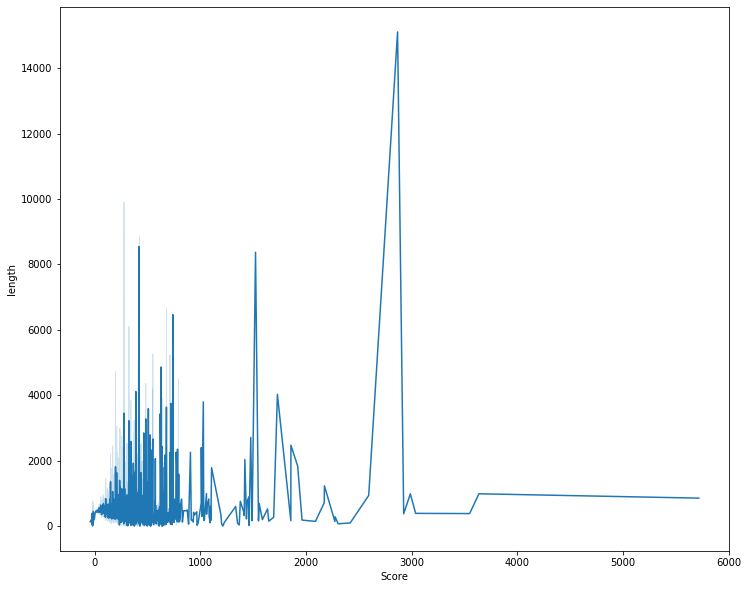

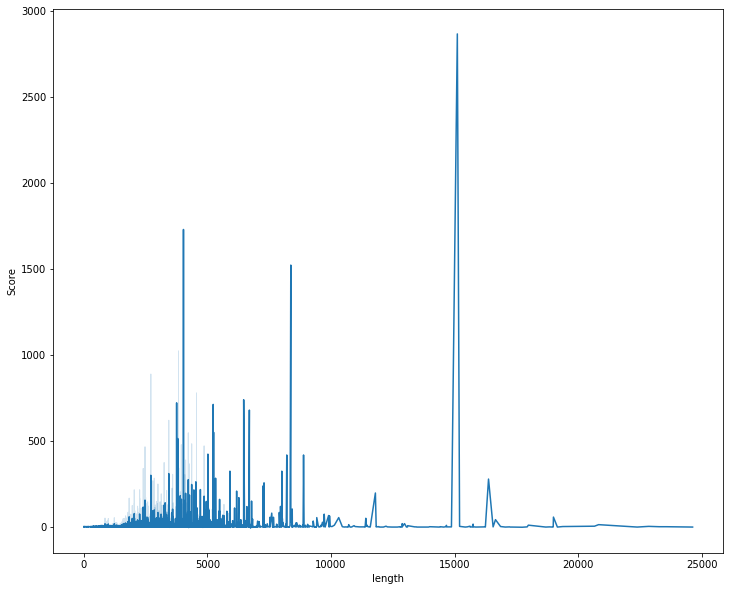

In [17]:
#==============================================================================
#=====     create some visualisations
#==============================================================================
# for the "Tags" dataset, we take a look at visualisation for the top tags
import matplotlib.pyplot as plt
from collections import Counter
count = Counter([i for i in data_tags.Tag]).most_common(50)

x = []; y = []; z = []
for i in range(len(count)):
	x.append(count[i][0])
	y.append(count[i][1])
	z.append((count[i][1])/100)
	
plt.figure(figsize = (14,8))
plt.scatter(x,y, c = y, s = z, alpha = 0.75)
plt.xticks(rotation = 60)

# lets take a look at the frequency of questions and answers against their scores
import seaborn as sns
answers = data_ans.sort_values(by = "Score", ascending = False).head(50)
questions = data_qns.sort_values(by = "Score", ascending = False).head(50)

fig, ax = plt.subplots(2,1, figsize = (14,8), sharex = True)
sns.distplot(answers.Score, bins = 50, ax = ax[0], color = 'navy')
sns.distplot(questions.Score, bins = 50, ax = ax[1], color = 'red')

# we take a look at the score against the len of the text, for the answers dataset
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
sns.lineplot(data_ans.Score, data_ans.length)

plt.figure(figsize = (12,10))
sns.lineplot(data_ans.length, data_ans.Score)
plt.show()


In [12]:
#==============================================================================
#=====     start using SpaCy + text pre-processing
#==============================================================================
# load packages and “SpaCy”
import re
import spacy
nlp = spacy.load('en_core_web_sm')  # nlp = spacy.load('en_core_web_lg')

# due to memory constraints, we limit the number of documents to read in
# create a ranked column based on the longest text length, but based on scores
data_qns_ranked = data_qns[(data_qns['Score'] > 200)  & 
						   (data_qns['length'] < 5000) &
						   (data_qns['length'] > 2000)]

data_qns_ranked = data_qns_ranked.sort_values(by = ['Score', 'length'], ascending = False)
data_qns_ranked_truncated = data_qns_ranked.head(1)  # LIMIT NUMBER OF TEXT
data_qns_ranked_truncated

# for the answers dataset
data_ans_ranked = data_ans.sort_values(by =['length'], ascending = False)
data_ans_ranked_truncated = data_ans_ranked.head(1)  # LIMIT NUMBER OF TEXT

# lets collapse all the text into one variable
all_sentences = [text for text in data_qns_ranked_truncated.cleaned_qns]  
doc = nlp(str(all_sentences))

# performing sentence tokenization using "SpaCy"
sentence_list=[]
for idx, sentence in enumerate(doc.sents): # we are using spacy for sentence tokenization
	sentence_list.append(re.sub(r'[^\w\s]','',str(sentence)))  # remove punctuations and special characters

len(sentence_list) # XXXX sentences

# create the corpus for stopwords
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words('english'))

# remove the stopwords in each sentence
from nltk.tokenize import word_tokenize

cleaned_sentences = []
for i in range(len(sentence_list)):
	cleaned_sentences.append(' '.join(word for word in word_tokenize(sentence_list[i]) if word not in eng_stopwords and len(word) > 2))		
	
cleaned_sentences


['One thing Ive always wanted develop operating system necessarily fancy like Linux Windows better simple boot loader Ive already done',
 'hard time finding resources',
 'guides take past writing simple Hello World',
 'know lots people probably recommend look Linux BSD code base systems like presumably big wouldnt know start',
 'Any suggestions',
 'Update',
 'make easier people land post Google development resources',
 'Writing Your Own Operating System',
 'Thanks AdamLinux From Scratch Thanks JohnSharpOS Operating System',
 'Thanks lomaxxMinix3 Minix2',
 'Thanks MikeOS Dev Wiki Forums Thanks SteveBonaFide',
 'Thanks SteveBran',
 'Thanks SteveRoll toy UNIXclone',
 'Thanks SteveBroken Thorn Development Series Other resources found nice resource named MikeOS MikeOS learning tool demonstrate simple OSes work',
 'uses 16bit real mode BIOS access doesnt need complex drivers Updated 111408',
 'found resources Freebytes Guide',
 'Free nonfree Operating Systems links kits OSKit ExOS library',


In [13]:
#==============================================================================
#=====     start creating "GloVe" word embeddings
#==============================================================================
# we use "GloVe" word embeddings which are vector representation of words
# word embeddings will be used to create vectors for our sentences
# we could have used bag-of-words or TF-IDF approaches to create features for our sentences
# but these methods ignore the order of the words (and the number of features is usually large)

# we load a pre-trained Wikipedia 2014 + Gigaword 5 GloVe vectors
import numpy as np

word_embeddings = {}  # create a dictionary
f = open('glove.6B.100d.txt', encoding = 'utf-8')
for line in f:
	values = line.split() 
	word = values[0]  # this is the "key"
	coefs = np.asarray(values[1:], dtype='float32')  # collect the values into the dictionary
	word_embeddings[word] = coefs # create the dictionary
f.close()

len(word_embeddings) # word vectors for 400,000 different terms stored in the dictionary


400000

In [14]:
#==============================================================================
#=====     create vectors for our sentences
#==============================================================================
# fetch vectors (each of size 100 elements) for the constituent words in a sentence
import numpy as np

sentence_vectors = []
for i in cleaned_sentences:
	if len(i) != 0:
		# use the "get" method to get the "value", given the "key" 
		# (key is the word from the sentence)
		# furthermore, these matrices (or coefficients) are summed
		v = sum([word_embeddings.get(w, np.zeros(100,)) for w in i.split()]) / (len(i.split()) + 0.001)
	else:
		v = np.zeros(100,)
	sentence_vectors.append(v)

# each item is the collective importance of the sentence, 
# based on the importance of the words it contains
sentence_vectors  


[array([-0.09127834,  0.26438128,  0.09459682, -0.23043153, -0.0990314 ,
        -0.03752526, -0.10315114,  0.06188016,  0.06015414,  0.1121924 ,
         0.02652378, -0.05651217,  0.22492216,  0.02984621,  0.03728642,
        -0.16326683,  0.10340513,  0.19084596, -0.14744168,  0.19692051,
         0.03894265,  0.06083576,  0.06340688, -0.23835688,  0.03009914,
        -0.04391706, -0.26658567, -0.33320969, -0.08517914, -0.1650358 ,
         0.0471483 ,  0.41261472, -0.08129564, -0.10880956,  0.40937654,
         0.18218944, -0.13557677,  0.04024814,  0.10825359, -0.2539928 ,
        -0.03582346, -0.02651557,  0.05374706, -0.26388226, -0.2619809 ,
         0.01040013,  0.13585382, -0.1609875 ,  0.01855442, -0.52990601,
         0.0161172 ,  0.02107335, -0.05843893,  0.62178557,  0.02454802,
        -1.36228352,  0.07423689,  0.10930088,  0.95726565,  0.14069187,
        -0.03202725,  0.38857757, -0.18861377,  0.03696725,  0.4629761 ,
         0.10564461,  0.25402274,  0.05762126, -0.0

In [18]:
#==============================================================================
#=====     create the similarity matrix, to find similarity between sentences
#==============================================================================
# we use the cosine similarity approach for this challenge
from sklearn.metrics.pairwise import cosine_similarity

# create similarity matrix
similarity_matrix = np.zeros([len(sentence_list), len(sentence_list)])

# initialize the similarity matrix with cosine similarity scores
for i in range(len(sentence_list)-1):
	for j in range(len(sentence_list)-1):
		if i != j:
			similarity_matrix[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100),
					                                    sentence_vectors[j].reshape(1,100))[0][0]

cosine_similarity(sentence_vectors[2].reshape(1,100), sentence_vectors[4].reshape(1,100))[0,0]


0.5622550378824911

In [16]:
#==============================================================================
#=====     apply the PageRank Algorithm
#==============================================================================
# we attempt to convert the similarity matrix into a graph
# nodes of the graph will represent the sentences 
# edges will represent the similarity scores between the sentences
# on this graph, we will apply the PageRank algorithm to arrive at the sentence rankings
import networkx as nx

nx_graph = nx.from_numpy_array(similarity_matrix)
scores = nx.pagerank(nx_graph)

# extract the top 5 sentences as the summary
num_to_extract = 5
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentence_list)), reverse=True)

ranked_output = []
for i in range(num_to_extract):
	ranked_output.append(ranked_sentences[i][1])
	
import pandas as pd
pd.set_option('display.max_colwidth', -1)
data_qns_ranked_truncated
ranked_output


['Thanks Tim S Van Haren for telling us about Cosmos an OS written entirely in c tgiphil tells us about Managed Operating System Alliance MOSA Framework a set of tools specifications and source code to foster development of managed operating systems based on the Common Intermediate Language',
 'Update 9242009 Steve found a couple resources for development on windows using Visual Studio check out BrokenThorns guide setup with VS 2005 or OSDevs VS Section',
 'Thanks SteveBroken Thorn OS Development Series Other resources I found a nice resource named MikeOS MikeOS is a learning tool to demonstrate how simple OSes work',
 'Updated 3909 Dinah provided some useful Stack Overflow discussion of aspiring OS developers Roadblocks in creating a custom operating system discusses what pitfalls you might encounter while developing an OSand OS Development is a more general discussion',
 'One thing Ive always wanted to do is develop my very own operating system not necessarily fancy like Linux or Win